In [1]:
import numpy as np
from matplotlib import pyplot as plt

from dftpy.ions import Ions
from dftpy.functional import Functional
from dftpy.formats import io

from ase.build import bulk
from ase.io import read

from scipy.optimize import minimize

In [2]:
path_pp='/Users/valeria/Documents/PP/ofpp/EAC/upf/blps/'
file1='si.lda.upf'
PP_list = {'Si': path_pp+file1}

In [4]:
Ks_bcc_KE = []

for i in np.arange(0,30,1):
   
    with open('/Users/valeria/Documents/aiWT/Final_version/wt/wt/ks_calculations/Si_bcc/DATA2/Si'+str(i)+'.out') as D:
        k = [match for match in D if "Kinetic energy" in match]
    KS_bcc = str(k).split()[6]
    Ks_bcc_KE.append(float(KS_bcc))
    


In [5]:
ks_ke = np.asarray(Ks_bcc_KE)

In [6]:
def min_energy(x0, *args):
        KS_KE, rho = args
        KE = Functional(type='KEDF',name='WT', rho0=x0)
        OF_KE = KE(rho).energy
        diff = np.abs(KS_KE*1/2-OF_KE)
        return diff

In [7]:
l = np.linspace(0.8, 1.4, 30)
delta_E = []
R0 = []
vol = []
for i in np.arange(0,30,1):
    rho = io.read_density('/Users/valeria/Documents/aiWT/Final_version/wt/wt/ks_calculations/Si_bcc/DATA2/rho0'+str(i)+'.xsf')
    ions = Ions.from_ase(bulk('Si', 'bcc', a= 3.09, cubic=True))
    cell = ions.get_cell()
    ions.set_cell(cell * l[i], scale_atoms=True) 
    KS_KE = float(ks_ke[i])
    minn = minimize(min_energy, 0.01, args = (KS_KE, rho), method='Powell', bounds=[[0.0,0.1]], options={'xtol': 1e-8,'ftol' : 1e-8})
    VOLUME = ions.get_volume()
    vol.append(VOLUME)
    delta_E.append(minn.fun)
    R0.append(minn.x)

Text(0, 0.5, '$ρ_{0}$')

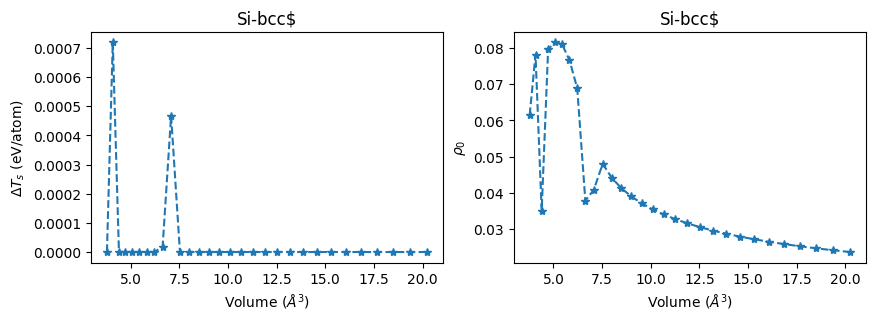

In [8]:
fig, axs = plt.subplots(1,2, figsize=(10,3))
im0 = axs[0].plot(np.asarray(vol)*0.529177**3/4,np.asarray(delta_E)*1/4,'*--')
im1 = axs[1].plot(np.asarray(vol)*0.529177**3/4,np.asarray(R0),'*--')
axs[0].set_title('Si-bcc$')
axs[1].set_title('Si-bcc$')
axs[0].set_xlabel('Volume ($\AA^{3}$)')
axs[0].set_ylabel('$\Delta T_{s}$ (eV/atom)')
axs[1].set_xlabel('Volume ($\AA^{3}$)')
axs[1].set_ylabel('$\u03C1_{0}$')

There exist multiple values of $\rho_{0}$ that can minimize the difference between KS and OF kinetic energy, for that in the two points we run again fe function min_energy and define new bounds where we know there will be a nother $\rho_{0}$ that minimizes the difference between both KE

In [10]:
l = np.linspace(0.8, 1.4, 30)
delta_E1 = []
R1 = []
vol1 = []
for i in np.arange(0,10,1):
    rho = io.read_density('/Users/valeria/Documents/aiWT/Final_version/wt/wt/ks_calculations/Si_bcc/DATA2/rho0'+str(i)+'.xsf')
    ions = Ions.from_ase(bulk('Si', 'bcc', a= 3.09, cubic=True))
    cell = ions.get_cell()
    ions.set_cell(cell * l[i], scale_atoms=True) 
    KS_KE = float(ks_ke[i])
    minn = minimize(min_energy, 0.05, args = (KS_KE, rho), method='Powell', bounds=[[0.045,0.1]], options={'xtol': 1e-8,'ftol' : 1e-8})
    VOLUME = ions.get_volume()
    vol1.append(VOLUME)
    delta_E1.append(minn.fun)
    R1.append(minn.x)

In [11]:
rho0 = np.asarray(R0)
d_E = np.asarray(delta_E)
for i in np.arange(0,10,1):
    rho0[i] = np.asarray(R1[i])
    d_E[i] = np.asarray(delta_E1[i])

Text(0, 0.5, '$ρ_{0}$')

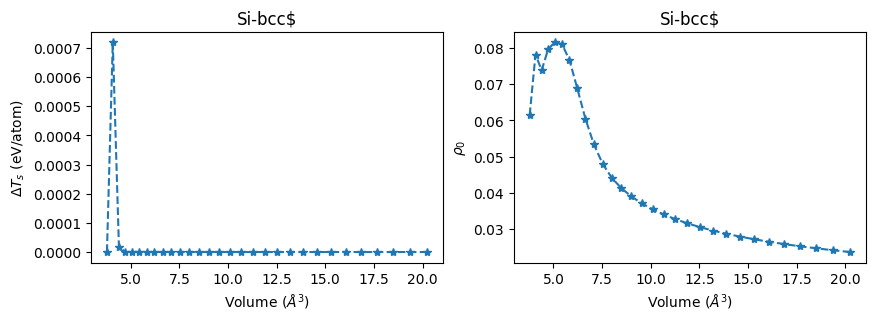

In [12]:
fig, axs = plt.subplots(1,2, figsize=(10,3))
im0 = axs[0].plot(np.asarray(vol)*0.529177**3/4,np.asarray(d_E)*1/4,'*--')
im1 = axs[1].plot(np.asarray(vol)*0.529177**3/4,np.asarray(rho0),'*--')
axs[0].set_title('Si-bcc$')
axs[1].set_title('Si-bcc$')
axs[0].set_xlabel('Volume ($\AA^{3}$)')
axs[0].set_ylabel('$\Delta T_{s}$ (eV/atom)')
axs[1].set_xlabel('Volume ($\AA^{3}$)')
axs[1].set_ylabel('$\u03C1_{0}$')

In [19]:
np.save(".../Si-bcc/DATA2/rho0.npy", np.asarray(rho0))